<a href="https://colab.research.google.com/github/mananrajvir/mplbasketball-nba-shooting/blob/main/Recreating_NBA_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unlocking Luka: Visualizing Shooting Data with mplbasketball**

This project explores how MLSE's **`mplbasketball`** Python library can be used alongside Python's **`nba_api`** to complement an article about Luka Doncic's shooting tendencies. Inspired by ["Luka Doncic Might Have a Killer Jump Shot Now. Good Luck, NBA Defenders"](https://www.nytimes.com/athletic/2394623/2021/03/05/luka-doncic-jumper-nba-mavericks/) from The Athletic, the goal is to visualize key shooting data—such as shot locations and efficiency—to enhance the analysis of Luka's evolving jump shot.

By leveraging data visualizations, this project demonstrates how advanced basketball analytics can complement an in-depth article, providing readers with a clearer view of Luka's shooting impact.

In [8]:
# pip install mplbasketball

In [9]:
# pip install nba_api

In [10]:
from mplbasketball import Court
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

pd.set_option('display.max_columns', None)

## **I. Visualizing Shooting Chart for a Single Game**

To start, we utilize the `mplbasketball` library to create a visualization of Luka Doncic's shot map from a single game: </br>
**Minnesota Timberwolves vs. LA Lakers [Feb 28, 2025]**

In [11]:
#Get the Team ID for Lakers:

from nba_api.stats.static import teams
nba_teams = pd.DataFrame(teams.get_teams())
nba_teams[nba_teams.full_name.str.contains('Lakers')]

#Team ID for Lakers = 1610612747

,id,full_name,abbreviation,nickname,city,state,year_founded
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948


In [12]:
#Get the Player ID for Luka Doncic:

from nba_api.stats.static import players
nba_players = pd.DataFrame(players.get_players())
nba_players[nba_players.full_name.str.contains('Luka')]

#Player ID for Luka Doncic = 1629029

,id,full_name,first_name,last_name,is_active
1130,1629029,Luka Dončić,Luka,Dončić,True
1519,1630568,Luka Garza,Luka,Garza,True
3890,1629677,Luka Samanic,Luka,Samanic,False


In [13]:
#Find the Game ID for Lakers vs Timberwolves (Feb 28th):

from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612747)
games = gamefinder.get_data_frames()[0]
games.head(3)

#Game ID = 0022400849

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612747,LAL,Los Angeles Lakers,0022400874,2025-03-02,LAL vs. LAC,W,240,108,38,77,0.494,18,42,0.429,14,20,0.700,11,30,41,21,8,6,16,16,6.0
1,22024,1610612747,LAL,Los Angeles Lakers,0022400859,2025-02-28,LAL vs. LAC,W,240,106,39,80,0.488,11,33,0.333,17,22,0.773,10,29,39,19,14,5,15,14,4.0
2,22024,1610612747,LAL,Los Angeles Lakers,0022400849,2025-02-27,LAL vs. MIN,W,240,111,34,82,0.415,11,41,0.268,32,46,0.696,16,36,52,21,7,2,12,18,9.0


In [14]:
# Get the Shooting Data for Doncic for the particular game
from nba_api.stats.endpoints import shotchartdetail

shot_chart = shotchartdetail.ShotChartDetail(
    team_id = 1610612747,
    player_id = 1629029,
    season_type_all_star = 'Regular Season',
    game_id_nullable= '0022400849',
   context_measure_simple	= 'FGA'
)

shot_chart = shot_chart.get_data_frames()[0]
shot_chart.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022400849,17,1629029,Luka Dončić,1610612747,Los Angeles Lakers,1,10,18,Made Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,11,53,105,1,1,20250227,LAL,MIN
1,Shot Chart Detail,0022400849,24,1629029,Luka Dončić,1610612747,Los Angeles Lakers,1,9,30,Missed Shot,Running Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-142,207,1,0,20250227,LAL,MIN
2,Shot Chart Detail,0022400849,31,1629029,Luka Dončić,1610612747,Los Angeles Lakers,1,9,0,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,28,-70,278,1,0,20250227,LAL,MIN
3,Shot Chart Detail,0022400849,51,1629029,Luka Dončić,1610612747,Los Angeles Lakers,1,7,24,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-1,28,1,1,20250227,LAL,MIN
4,Shot Chart Detail,0022400849,56,1629029,Luka Dončić,1610612747,Los Angeles Lakers,1,6,47,Made Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,15,67,137,1,1,20250227,LAL,MIN


The dataframe gives us several details regarding Luka Doncic's shots, including:
* Result of Shot [Made Shot or Missed Shot] -- EVENT_TYPE
* Type of Shot [Fadeaway Jump Shot, Running Jump Shot, Driving Layup Shot] -- ACTION_TYPE
* Points [2 PT Field Goal or 3PT Field Goal] -- SHOT_TYPE
* Location of the Shot -- LOC_X and LOX_Y

In [15]:
shot_chart.ACTION_TYPE.unique()

array(['Fadeaway Jump Shot', 'Running Jump Shot', 'Jump Shot',
       'Driving Layup Shot', 'Pullup Jump shot',
       'Driving Finger Roll Layup Shot', 'Step Back Jump shot',
       'Turnaround Fadeaway shot', 'Driving Floating Bank Jump Shot',
       'Running Reverse Layup Shot'], dtype=object)

In [16]:
#The Shot Type can be categorized into: Jump Shot, Layup Shot, Dunk and Others
shot_chart['Shot_Type'] = np.where(shot_chart['ACTION_TYPE'].str.contains('Layup'), 'Layup Shot',
                                  np.where(shot_chart['ACTION_TYPE'].str.contains('Dunk'), 'Dunk',
                                           np.where(shot_chart['ACTION_TYPE'].str.contains('Jump'), 'Jump Shot',
                                                    'Other')))

shot_chart.rename(columns = {'EVENT_TYPE' : 'Event_Type'}, inplace = True)

> **Plot the Shooting Data using mplbasketball**

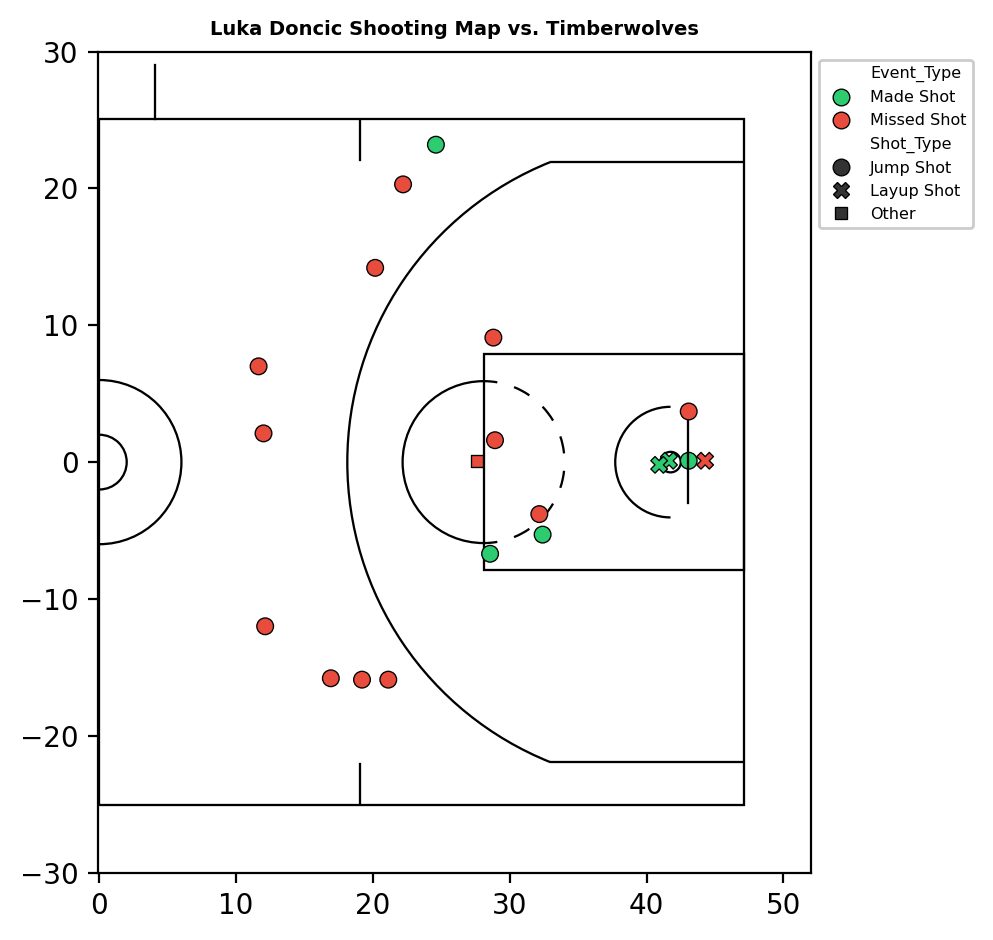

In [17]:
#Create the baselayer (basketball court)
court = Court(court_type='nba', origin = 'center', units = 'ft')
fig, ax = court.draw(showaxis = True, orientation='hr' )

#The location_x and location_y values need to be standardized, since nba_api and mplbasketball use different ranges for the coordinates
original_min = 0
original_max = 750
new_min = -45
new_max = 45

x = (((shot_chart['LOC_Y'] - original_min) / (original_max - original_min)) * (new_max - new_min) + new_min) * -1.0
y = (shot_chart['LOC_X'] / 10) * -1.0

colors = {
    'Made Shot': '#2ECC71',
    'Missed Shot': '#E74C3C'
}

sns.scatterplot(x = x, y = y, hue = shot_chart['Event_Type'], style = shot_chart['Shot_Type'], palette=colors, edgecolor = 'black')
plt.legend(loc = 'upper left',  fontsize = 'xx-small', facecolor = 'white', framealpha = 1, bbox_to_anchor=(1, 1))

#Refine the visualization for Online Sports Articles
ax.set(xlabel=None, ylabel = None)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Luka Doncic Shooting Map vs. Timberwolves', fontdict={ 'fontsize': 7, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

The X and Y coordinates for the shooting location have to be rescaled, since nba_api and mplbasketball use different coordinate systems for shot locations. These differences include:
* Origin Points:
  * mplbasketball uses a coordinate system where (0,0) is at the center of the court
  * nba_api uses a coordinate system where (0,0) is the bottom left corner of the court
* Measurement Scales:
  * mplbasketball values in the range of -45 to 45 for width, since the NBA court. However, the ranges of LOC_X and LOC_Y for nba_api ranges from -250 to 250 (LOC_X) and ~-50 to ~850 (LOC_Y)
* Coordinate Systems:
  * We also need to multiply the result with -1 because nba_api uses left hand coordinate system, where mplbasketball utilizes right hand coordinate system.


## **II. Comparing Shooting Charts of Different NBA Players**

Next, the mplbasketball library can also be used to compare the shooting charts of 2 different players: </br> **Luka Doncic vs. Donte Divincenzo Shooting Charts [last 10 games]**

In [18]:
#Get the Team ID for Timberwolves:

from nba_api.stats.static import teams
nba_teams = pd.DataFrame(teams.get_teams())
nba_teams[nba_teams.full_name.str.contains('Timberwolves')]

#Team ID for Timberwolves = 1610612750

,id,full_name,abbreviation,nickname,city,state,year_founded
13,1610612750,Minnesota Timberwolves,MIN,Timberwolves,Minnesota,Minnesota,1989


In [19]:
#Get the Player ID for Donte DiVincenzo:

from nba_api.stats.static import players
nba_players = pd.DataFrame(players.get_players())
nba_players[nba_players.full_name.str.contains('Donte')]

#Player ID for Donte DiVincenzo = 1628978

,id,full_name,first_name,last_name,is_active
1086,1628978,Donte DiVincenzo,Donte,DiVincenzo,True
1636,1629055,Donte Grantham,Donte,Grantham,False
1680,201590,Donte Greene,Donte,Greene,False
2181,200971,Dontell Jefferson,Dontell,Jefferson,False


In [20]:
# Luka's Shot Chart
luka_shot_chart = shotchartdetail.ShotChartDetail(
    team_id = 0,  #since Luka recently switched teams, we want data from both teams that he played for
    player_id = 1629029,
    season_type_all_star = 'Regular Season',
    context_measure_simple	= 'FGA',
    last_n_games = 10 #used to get data from last 10 games
)
luka_shot_chart = luka_shot_chart.get_data_frames()[0]

# Donte's Shot Chart
donte_shot_chart = shotchartdetail.ShotChartDetail(
    team_id = 0,
    player_id = 1628978,
    season_type_all_star = 'Regular Season',
    context_measure_simple	= 'FGA',
    last_n_games = 10
)
donte_shot_chart = donte_shot_chart.get_data_frames()[0]

donte_shot_chart.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022400849,73,1628978,Donte DiVincenzo,1610612750,Minnesota Timberwolves,1,5,37,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-104,242,1,0,20250227,LAL,MIN
1,Shot Chart Detail,0022400849,101,1628978,Donte DiVincenzo,1610612750,Minnesota Timberwolves,1,3,24,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,-15,1,1,20250227,LAL,MIN
2,Shot Chart Detail,0022400849,441,1628978,Donte DiVincenzo,1610612750,Minnesota Timberwolves,3,5,1,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,44,257,1,0,20250227,LAL,MIN
3,Shot Chart Detail,0022400849,479,1628978,Donte DiVincenzo,1610612750,Minnesota Timberwolves,3,2,8,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-234,99,1,1,20250227,LAL,MIN
4,Shot Chart Detail,0022400849,567,1628978,Donte DiVincenzo,1610612750,Minnesota Timberwolves,4,9,23,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,141,227,1,0,20250227,LAL,MIN


In [21]:
luka_shot_chart['Shot_Type'] = np.where(luka_shot_chart['ACTION_TYPE'].str.contains('Layup'), 'Layup Shot',
                                  np.where(luka_shot_chart['ACTION_TYPE'].str.contains('Dunk'), 'Dunk',
                                           np.where(luka_shot_chart['ACTION_TYPE'].str.contains('Jump'), 'Jump Shot',
                                                    'Other')))

luka_shot_chart.rename(columns = {'EVENT_TYPE' : 'Event_Type'}, inplace = True)

donte_shot_chart['Shot_Type'] = np.where(donte_shot_chart['ACTION_TYPE'].str.contains('Layup'), 'Layup Shot',
                                  np.where(donte_shot_chart['ACTION_TYPE'].str.contains('Dunk'), 'Dunk',
                                           np.where(donte_shot_chart['ACTION_TYPE'].str.contains('Jump'), 'Jump Shot',
                                                    'Other')))

donte_shot_chart.rename(columns = {'EVENT_TYPE' : 'Event_Type'}, inplace = True)

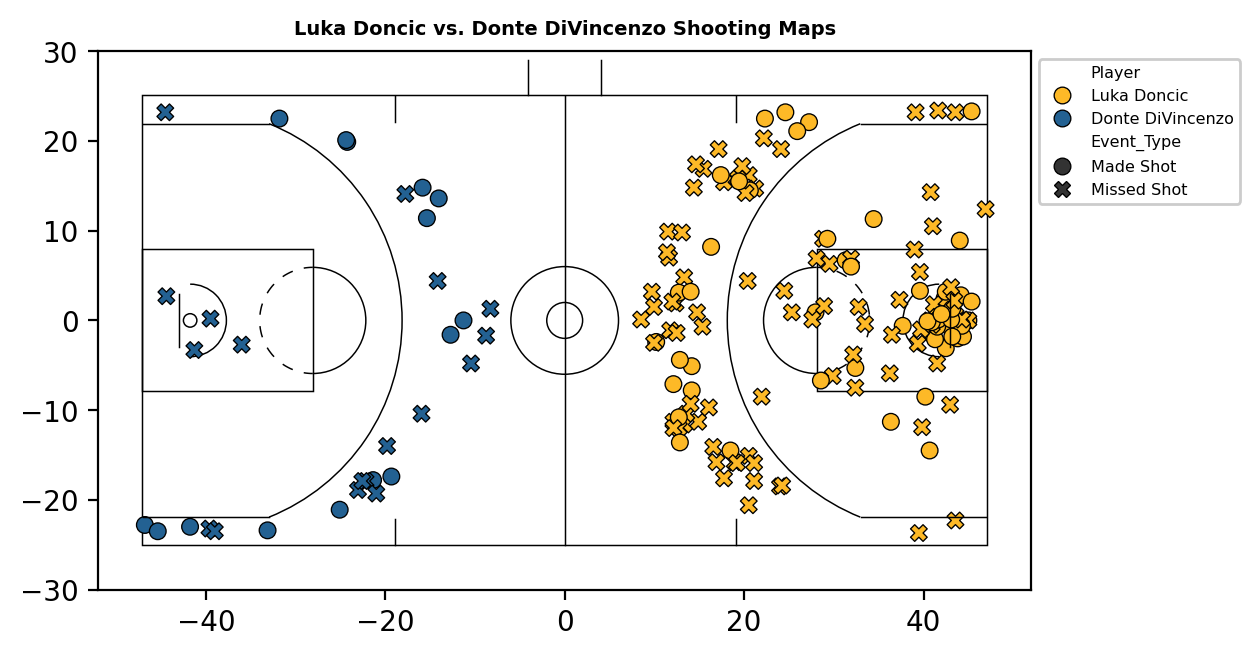

In [22]:
from mplbasketball.utils import transform

#Create the baselayer (full basketball court)
court = Court(court_type='nba', origin = 'center', units = 'ft')
fig, ax = court.draw(showaxis = True)

original_min = 0
original_max = 750
new_min = -45
new_max = 45

#We once again need to standardize our datasets to convert from nba_api coordinates to mplbasketball coordinates
x_luka = (((luka_shot_chart['LOC_Y'] - original_min) / (original_max - original_min)) * (new_max - new_min) + new_min) * -1.0
y_luka = (luka_shot_chart['LOC_X'] / 10) * -1.0

x_donte = (((donte_shot_chart['LOC_Y'] - original_min) / (original_max - original_min)) * (new_max - new_min) + new_min) * -1.0
y_donte = (donte_shot_chart['LOC_X'] / 10) * -1.0

#Additionally, since we want to compare the data for 2 players, we will transform the coordinates
#Luka's coordinates are transformed to Right Half of the court
x_luka_hr, y_luka_hr = transform(x_luka, y_luka, fr="h", to="hr", origin='center')
#Donte's coordinates are transformed to Left Half of the court
x_donte_hl, y_donte_hl = transform(x_donte, y_donte, fr="h", to="hl", origin='center')

#Combine the dataframes to make it easier to plot and label
luka_shot_chart['X_transformed'] = x_luka_hr
luka_shot_chart['Y_transformed'] = y_luka_hr
luka_shot_chart['Player'] = 'Luka Doncic'

donte_shot_chart['X_transformed'] = x_donte_hl
donte_shot_chart['Y_transformed'] = y_donte_hl
donte_shot_chart['Player'] = 'Donte DiVincenzo'

combined_shot_chart = pd.concat([luka_shot_chart, donte_shot_chart], axis = 0)

#Create the scatter plot for shot locations
colors = {
    'Luka Doncic': '#FDB927',
    'Donte DiVincenzo': '#236192'
}

markers = {
    'Made Shot': 'o',
    'Missed Shot': 'X',
}

sns.scatterplot(data = combined_shot_chart, x = 'X_transformed', y = 'Y_transformed', hue = 'Player', style = 'Event_Type', palette=colors, markers=markers, edgecolor = 'black')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1),  fontsize = 'xx-small', facecolor = 'white', framealpha = 1)
ax.set(xlabel=None, ylabel = None)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Luka Doncic vs. Donte DiVincenzo Shooting Maps', fontdict={ 'fontsize': 7, 'fontweight' : 'bold' } )

plt.tight_layout()
plt.show()

The shot chart above demonstrates the capabilities of the mplbasketball library in comparing player shooting trends. In this visualization, we analyze Luka Doncic's shot distribution over his last 10 games alongside Donte DiVincenzo, an opponent from his recent matchup against the Minnesota Timberwolves.

From the chart, it's evident that Luka is a high-volume shooter and primary shot creator. His shot selection includes a balanced mix of two-point jumpers, drives to the rim, and three-point attempts. In contrast, Donte DiVincenzo operates primarily as a perimeter threat, relying on catch-and-shoot opportunities and taking significantly fewer overall shot attempts. This comparison highlights the differences in their offensive roles—Luka as a dominant playmaker and scorer, while Donte serves as a complementary floor spacer.

## **III. Visualiing Heatmaps for Shooting Trends**

The mplbasketball library can also be effectively used to analyze a player's shooting trends throughout the season. While a scatter plot could capture individual shot attempts, it often becomes cluttered due to the sheer volume of data points. To provide a clearer representation, this data can be visualized as a heatmap, which highlights the specific areas on the court where a player frequently shoots from.

A heatmap not only reduces visual clutter but also offers a more insightful view of the player's shooting preferences, making it easier to identify key zones of attack.

In [23]:
# Luka's Shot Chart for 2024-25 Season
luka_shot_chart_season = shotchartdetail.ShotChartDetail(
    team_id = 0,  #since Luka recently switched teams, we want data from both teams that he played for this season
    player_id = 1629029,
    season_type_all_star = 'Regular Season',
    context_measure_simple	= 'FGA',
    season_nullable = '2024-25'
)
luka_shot_chart_season = luka_shot_chart_season.get_data_frames()[0]

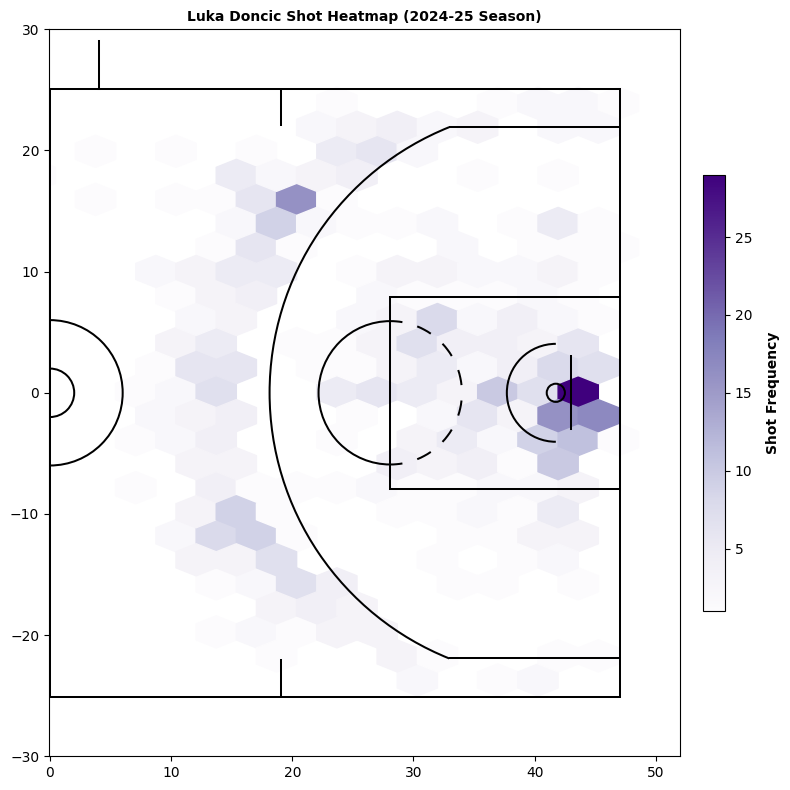

In [24]:
# Create court
court = Court(court_type='nba', origin='center', units='ft')
fig, ax = plt.subplots(figsize=(12, 8))

court.draw(ax, showaxis = True, orientation='hr')

#The location_x and location_y values need to be standardized, since nba_api and mplbasketball use different ranges for the coordinates
original_min = 0
original_max = 750
new_min = -45
new_max = 45

x = (((luka_shot_chart_season['LOC_Y'] - original_min) / (original_max - original_min)) * (new_max - new_min) + new_min) * -1.0
y = (luka_shot_chart_season['LOC_X'] / 10) * -1.0

# Create hexbin plot with a colormap
hb = ax.hexbin(x, y, gridsize=(18, 12), cmap='Purples', zorder=0, mincnt=1)

# Add a smaller colorbar (legend)
cb = fig.colorbar(hb, ax=ax, shrink=0.6, pad=0.02)
cb.set_label("Shot Frequency", fontsize=10, fontweight = 'bold', labelpad = 10)
cb.ax.tick_params(labelsize=10)

# Show the plot
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Luka Doncic Shot Heatmap (2024-25 Season)', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

The heatmap above illustrates Luka Doncic's shot distribution for the 2024-25 NBA season, providing insight into his offensive tendencies. The takeaways from the chart include:
* Heavy Concentration Near the Rim - The dark purple hexagons around the basket indicate Doncic's preference for finishing at the rim, a key part of his offensive game.
* Selective 3-Point Shooting - There are notable clusters beyond the three-point arc, particularly from high-efficiency spots.

This visualization reinforces Doncic's scoring philosophy, showcasing his ability to generate high-percentage looks in the paint while maintaining a presence from deep.